In [1]:
import sys
sys.path.append('/Users/vikaspandey/my_projects/deeplearning_ai')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from algorithms.regression.linear_regressor import LinearRegressor
from sklearn.model_selection import train_test_split
from algorithm_performance.matrics import PerformanceMetrics
boston_dataset = load_boston()

In [2]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
boston['MEDV'] = boston_dataset.target

In [5]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
boston.sum().isnull()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

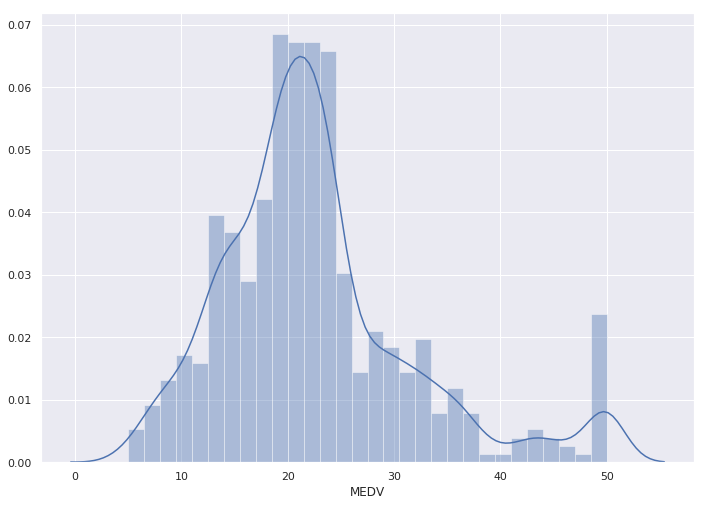

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

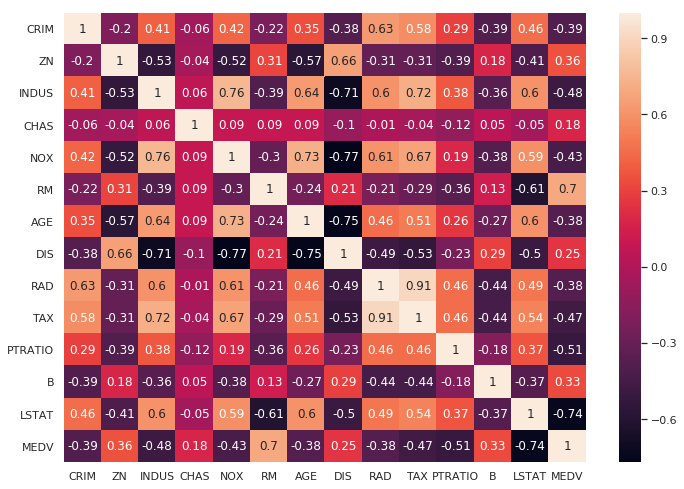

In [8]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

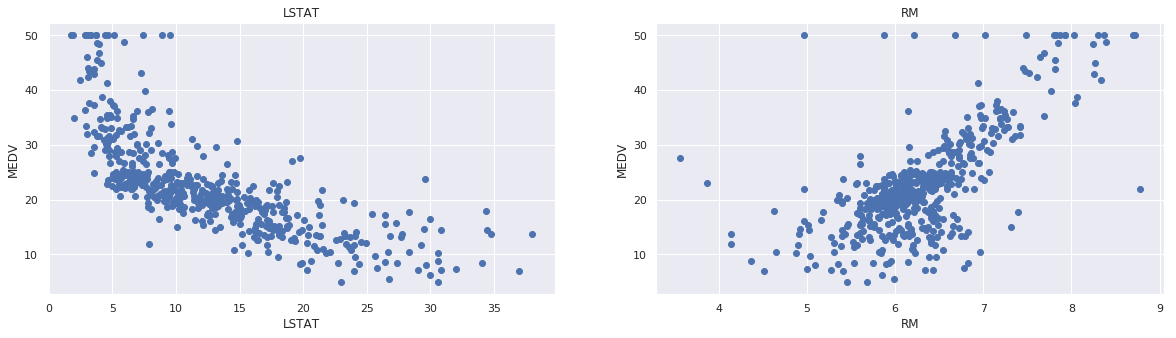

In [9]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [10]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)


In [42]:
X_test

,LSTAT,RM
226,3.13,8.040
292,4.70,6.630
90,8.81,6.417
373,34.77,4.906
273,6.58,7.691
417,26.64,5.304
503,5.64,6.976
234,8.05,6.726
111,10.16,6.715
472,14.36,6.437


In [33]:
Y_train = Y_train[:,np.newaxis]
Y_test = Y_test[:, np.newaxis]

In [34]:
Y_train.shape

(404, 1)

In [35]:
model = LinearRegressor()
model.fit(X_train, Y_train)

The cost is 299.38922029702974
The cost is 299.38845692801476
The cost is 299.38769356246036
The cost is 299.3869302003665
The cost is 299.38616684173326
The cost is 299.38540348656045
The cost is 299.38464013484815
The cost is 299.3838767865963
The cost is 299.383113441805
The cost is 299.38235010047407
The cost is 299.3815867626036
The cost is 299.3808234281936
The cost is 299.38006009724387
The cost is 299.37929676975455
The cost is 299.3785334457257
The cost is 299.3777701251571
The cost is 299.3770068080489
The cost is 299.37624349440097
The cost is 299.3754801842134
The cost is 299.37471687748604
The cost is 299.373953574219
The cost is 299.37319027441225
The cost is 299.3724269780657
The cost is 299.3716636851793
The cost is 299.3709003957532
The cost is 299.3701371097873
The cost is 299.3693738272815
The cost is 299.36861054823584
The cost is 299.3678472726504
The cost is 299.36708400052504
The cost is 299.3663207318598
The cost is 299.36555746665465
The cost is 299.36479420490

The cost is 299.094054805756
The cost is 299.0932927747686
The cost is 299.09253074723534
The cost is 299.09176872315646
The cost is 299.09100670253184
The cost is 299.0902446853614
The cost is 299.08948267164527
The cost is 299.08872066138326
The cost is 299.0879586545756
The cost is 299.087196651222
The cost is 299.0864346513226
The cost is 299.0856726548773
The cost is 299.0849106618862
The cost is 299.08414867234916
The cost is 299.08338668626624
The cost is 299.0826247036374
The cost is 299.0818627244627
The cost is 299.08110074874196
The cost is 299.08033877647534
The cost is 299.0795768076627
The cost is 299.078814842304
The cost is 299.07805288039935
The cost is 299.0772909219487
The cost is 299.07652896695197
The cost is 299.07576701540916
The cost is 299.0750050673203
The cost is 299.07424312268535
The cost is 299.07348118150423
The cost is 299.07271924377704
The cost is 299.0719573095038
The cost is 299.07119537868425
The cost is 299.07043345131854
The cost is 299.0696715274

The cost is 298.8123390124231
The cost is 298.811578258421
The cost is 298.8108175078672
The cost is 298.8100567607618
The cost is 298.8092960171046
The cost is 298.80853527689567
The cost is 298.80777454013503
The cost is 298.80701380682257
The cost is 298.8062530769584
The cost is 298.8054923505424
The cost is 298.80473162757454
The cost is 298.8039709080549
The cost is 298.80321019198334
The cost is 298.80244947936006
The cost is 298.8016887701848
The cost is 298.80092806445765
The cost is 298.80016736217857
The cost is 298.7994066633476
The cost is 298.79864596796466
The cost is 298.7978852760298
The cost is 298.7971245875429
The cost is 298.7963639025041
The cost is 298.7956032209132
The cost is 298.79484254277037
The cost is 298.7940818680754
The cost is 298.7933211968284
The cost is 298.79256052902934
The cost is 298.7917998646782
The cost is 298.791039203775
The cost is 298.79027854631966
The cost is 298.78951789231206
The cost is 298.7887572417524
The cost is 298.7879965946405

The cost is 298.50907179560005
The cost is 298.508312416194
The cost is 298.5075530402297
The cost is 298.50679366770737
The cost is 298.50603429862684
The cost is 298.50527493298813
The cost is 298.5045155707913
The cost is 298.5037562120362
The cost is 298.50299685672286
The cost is 298.50223750485134
The cost is 298.5014781564215
The cost is 298.5007188114335
The cost is 298.49995946988713
The cost is 298.49920013178246
The cost is 298.49844079711954
The cost is 298.49768146589827
The cost is 298.4969221381186
The cost is 298.4961628137806
The cost is 298.4954034928842
The cost is 298.4946441754294
The cost is 298.49388486141623
The cost is 298.4931255508446
The cost is 298.4923662437145
The cost is 298.491606940026
The cost is 298.49084763977896
The cost is 298.4900883429735
The cost is 298.4893290496094
The cost is 298.48856975968687
The cost is 298.4878104732058
The cost is 298.48705119016614
The cost is 298.48629191056796
The cost is 298.48553263441113
The cost is 298.4847733616

The cost is 298.21165867956034
The cost is 298.21090064813535
The cost is 298.210142620146
The cost is 298.2093845955921
The cost is 298.2086265744738
The cost is 298.207868556791
The cost is 298.2071105425437
The cost is 298.20635253173185
The cost is 298.20559452435555
The cost is 298.20483652041463
The cost is 298.20407851990916
The cost is 298.2033205228391
The cost is 298.2025625292045
The cost is 298.2018045390052
The cost is 298.20104655224134
The cost is 298.2002885689128
The cost is 298.1995305890196
The cost is 298.19877261256175
The cost is 298.19801463953917
The cost is 298.19725666995186
The cost is 298.1964987037999
The cost is 298.19574074108317
The cost is 298.1949827818017
The cost is 298.19422482595536
The cost is 298.1934668735443
The cost is 298.1927089245684
The cost is 298.19195097902775
The cost is 298.19119303692224
The cost is 298.19043509825184
The cost is 298.18967716301654
The cost is 298.18891923121646
The cost is 298.1881613028514
The cost is 298.187403377

The cost is 297.90569348395496
The cost is 297.90493683918885
The cost is 297.9041801978518
The cost is 297.90342355994375
The cost is 297.90266692546476
The cost is 297.9019102944148
The cost is 297.90115366679385
The cost is 297.90039704260187
The cost is 297.89964042183885
The cost is 297.8988838045048
The cost is 297.8981271905997
The cost is 297.89737058012355
The cost is 297.8966139730763
The cost is 297.89585736945793
The cost is 297.8951007692684
The cost is 297.8943441725078
The cost is 297.89358757917597
The cost is 297.8928309892731
The cost is 297.8920744027989
The cost is 297.89131781975357
The cost is 297.89056124013695
The cost is 297.8898046639492
The cost is 297.8890480911901
The cost is 297.8882915218598
The cost is 297.8875349559582
The cost is 297.88677839348526
The cost is 297.88602183444107
The cost is 297.8852652788255
The cost is 297.8845087266386
The cost is 297.88375217788035
The cost is 297.88299563255066
The cost is 297.88223909064965
The cost is 297.8814825

The cost is 297.6101066711173
The cost is 297.60935136589376
The cost is 297.608596064093
The cost is 297.60784076571497
The cost is 297.6070854707597
The cost is 297.60633017922726
The cost is 297.60557489111756
The cost is 297.6048196064305
The cost is 297.6040643251661
The cost is 297.6033090473245
The cost is 297.6025537729055
The cost is 297.6017985019092
The cost is 297.60104323433546
The cost is 297.6002879701844
The cost is 297.59953270945596
The cost is 297.5987774521501
The cost is 297.59802219826673
The cost is 297.597266947806
The cost is 297.5965117007678
The cost is 297.5957564571521
The cost is 297.59500121695896
The cost is 297.5942459801882
The cost is 297.59349074684
The cost is 297.5927355169143
The cost is 297.59198029041096
The cost is 297.5912250673301
The cost is 297.59046984767156
The cost is 297.5897146314355
The cost is 297.5889594186218
The cost is 297.5882042092305
The cost is 297.5874490032615
The cost is 297.5866938007149
The cost is 297.5859386015905
The 

The cost is 297.3338934551131
The cost is 297.3331394015629
The cost is 297.33238535142965
The cost is 297.33163130471326
The cost is 297.33087726141383
The cost is 297.33012322153127
The cost is 297.3293691850655
The cost is 297.3286151520167
The cost is 297.32786112238466
The cost is 297.32710709616947
The cost is 297.3263530733711
The cost is 297.3255990539895
The cost is 297.32484503802465
The cost is 297.3240910254766
The cost is 297.3233370163453
The cost is 297.32258301063075
The cost is 297.3218290083328
The cost is 297.32107500945165
The cost is 297.3203210139871
The cost is 297.3195670219393
The cost is 297.31881303330806
The cost is 297.31805904809346
The cost is 297.31730506629555
The cost is 297.31655108791415
The cost is 297.31579711294944
The cost is 297.3150431414012
The cost is 297.3142891732696
The cost is 297.3135352085544
The cost is 297.3127812472558
The cost is 297.31202728937376
The cost is 297.3112733349081
The cost is 297.31051938385895
The cost is 297.30976543

The cost is 297.06566618805175
The cost is 297.06491334991955
The cost is 297.06416051519864
The cost is 297.0634076838889
The cost is 297.06265485599044
The cost is 297.0619020315031
The cost is 297.061149210427
The cost is 297.060396392762
The cost is 297.0596435785082
The cost is 297.0588907676655
The cost is 297.0581379602339
The cost is 297.05738515621346
The cost is 297.05663235560405
The cost is 297.0558795584057
The cost is 297.0551267646184
The cost is 297.05437397424214
The cost is 297.0536211872769
The cost is 297.0528684037227
The cost is 297.0521156235794
The cost is 297.0513628468472
The cost is 297.05061007352595
The cost is 297.0498573036155
The cost is 297.0491045371161
The cost is 297.04835177402754
The cost is 297.0475990143499
The cost is 297.0468462580831
The cost is 297.04609350522713
The cost is 297.0453407557821
The cost is 297.0445880097478
The cost is 297.0438352671244
The cost is 297.04308252791174
The cost is 297.0423297921099
The cost is 297.0415770597188
T

The cost is 296.7956163863265
The cost is 296.7948647718043
The cost is 296.79411316068763
The cost is 296.7933615529764
The cost is 296.79260994867064
The cost is 296.7918583477704
The cost is 296.79110675027556
The cost is 296.79035515618614
The cost is 296.7896035655022
The cost is 296.78885197822365
The cost is 296.78810039435047
The cost is 296.78734881388266
The cost is 296.78659723682017
The cost is 296.78584566316306
The cost is 296.78509409291127
The cost is 296.7843425260648
The cost is 296.7835909626236
The cost is 296.7828394025876
The cost is 296.78208784595694
The cost is 296.7813362927315
The cost is 296.78058474291123
The cost is 296.77983319649627
The cost is 296.77908165348646
The cost is 296.7783301138818
The cost is 296.7775785776823
The cost is 296.776827044888
The cost is 296.7760755154988
The cost is 296.77532398951473
The cost is 296.77457246693575
The cost is 296.7738209477618
The cost is 296.77306943199295
The cost is 296.7723179196292
The cost is 296.77156641

The cost is 296.50274489137377
The cost is 296.5019946037921
The cost is 296.50124431960984
The cost is 296.5004940388268
The cost is 296.49974376144297
The cost is 296.49899348745845
The cost is 296.49824321687316
The cost is 296.4974929496871
The cost is 296.4967426859002
The cost is 296.4959924255125
The cost is 296.495242168524
The cost is 296.49449191493466
The cost is 296.49374166474445
The cost is 296.49299141795336
The cost is 296.49224117456134
The cost is 296.49149093456845
The cost is 296.49074069797456
The cost is 296.48999046477985
The cost is 296.48924023498415
The cost is 296.48849000858735
The cost is 296.4877397855897
The cost is 296.486989565991
The cost is 296.48623934979133
The cost is 296.4854891369905
The cost is 296.4847389275887
The cost is 296.48398872158583
The cost is 296.48323851898186
The cost is 296.48248831977685
The cost is 296.4817381239706
The cost is 296.48098793156333
The cost is 296.48023774255483
The cost is 296.4794875569453
The cost is 296.478737

The cost is 296.2313627755583
The cost is 296.23061371748275
The cost is 296.2298646628008
The cost is 296.2291156115124
The cost is 296.22836656361744
The cost is 296.22761751911594
The cost is 296.226868478008
The cost is 296.22611944029353
The cost is 296.22537040597246
The cost is 296.22462137504476
The cost is 296.22387234751056
The cost is 296.2231233233697
The cost is 296.22237430262226
The cost is 296.22162528526815
The cost is 296.2208762713074
The cost is 296.22012726074
The cost is 296.21937825356594
The cost is 296.2186292497852
The cost is 296.2178802493977
The cost is 296.2171312524034
The cost is 296.2163822588024
The cost is 296.21563326859473
The cost is 296.2148842817802
The cost is 296.2141352983589
The cost is 296.2133863183307
The cost is 296.21263734169577
The cost is 296.211888368454
The cost is 296.2111393986054
The cost is 296.21039043214984
The cost is 296.20964146908744
The cost is 296.20889250941815
The cost is 296.2081435531419
The cost is 296.2073946002587

The cost is 295.9626688772156
The cost is 295.9619210364001
The cost is 295.9611731989724
The cost is 295.9604253649326
The cost is 295.95967753428056
The cost is 295.9589297070163
The cost is 295.95818188313984
The cost is 295.95743406265115
The cost is 295.9566862455502
The cost is 295.9559384318369
The cost is 295.95519062151135
The cost is 295.95444281457355
The cost is 295.9536950110234
The cost is 295.9529472108609
The cost is 295.95219941408607
The cost is 295.9514516206989
The cost is 295.95070383069924
The cost is 295.94995604408734
The cost is 295.94920826086286
The cost is 295.948460481026
The cost is 295.94771270457676
The cost is 295.946964931515
The cost is 295.9462171618408
The cost is 295.94546939555414
The cost is 295.9447216326549
The cost is 295.94397387314314
The cost is 295.94322611701887
The cost is 295.942478364282
The cost is 295.94173061493257
The cost is 295.9409828689706
The cost is 295.9402351263959
The cost is 295.93948738720866
The cost is 295.938739651408

The cost is 295.69739814531306
The cost is 295.696651506184
The cost is 295.6959048704372
The cost is 295.6951582380725
The cost is 295.69441160909
The cost is 295.6936649834897
The cost is 295.69291836127155
The cost is 295.6921717424355
The cost is 295.6914251269816
The cost is 295.6906785149098
The cost is 295.68993190622
The cost is 295.68918530091236
The cost is 295.6884386989868
The cost is 295.6876921004432
The cost is 295.6869455052816
The cost is 295.68619891350204
The cost is 295.68545232510456
The cost is 295.68470574008893
The cost is 295.6839591584553
The cost is 295.6832125802036
The cost is 295.6824660053339
The cost is 295.681719433846
The cost is 295.68097286574005
The cost is 295.680226301016
The cost is 295.67947973967375
The cost is 295.6787331817134
The cost is 295.6779866271348
The cost is 295.67724007593813
The cost is 295.6764935281232
The cost is 295.6757469836901
The cost is 295.6750004426387
The cost is 295.6742539049691
The cost is 295.6735073706812
The cost

The cost is 295.4288264952475
The cost is 295.42808107269144
The cost is 295.427335653512
The cost is 295.42659023770904
The cost is 295.4258448252825
The cost is 295.42509941623246
The cost is 295.4243540105589
The cost is 295.42360860826176
The cost is 295.422863209341
The cost is 295.42211781379666
The cost is 295.42137242162875
The cost is 295.4206270328372
The cost is 295.41988164742196
The cost is 295.4191362653831
The cost is 295.41839088672054
The cost is 295.41764551143433
The cost is 295.4169001395244
The cost is 295.4161547709907
The cost is 295.4154094058333
The cost is 295.41466404405213
The cost is 295.41391868564716
The cost is 295.41317333061846
The cost is 295.412427978966
The cost is 295.4116826306896
The cost is 295.41093728578943
The cost is 295.41019194426536
The cost is 295.4094466061175
The cost is 295.40870127134576
The cost is 295.40795593995006
The cost is 295.40721061193045
The cost is 295.40646528728695
The cost is 295.4057199660195
The cost is 295.404974648

The cost is 295.1659019941379
The cost is 295.16515776250947
The cost is 295.1644135342519
The cost is 295.1636693093652
The cost is 295.16292508784954
The cost is 295.16218086970474
The cost is 295.16143665493075
The cost is 295.16069244352764
The cost is 295.1599482354954
The cost is 295.15920403083396
The cost is 295.15845982954335
The cost is 295.15771563162355
The cost is 295.15697143707445
The cost is 295.1562272458961
The cost is 295.15548305808863
The cost is 295.1547388736518
The cost is 295.1539946925857
The cost is 295.1532505148903
The cost is 295.1525063405656
The cost is 295.1517621696116
The cost is 295.15101800202814
The cost is 295.15027383781546
The cost is 295.14952967697326
The cost is 295.1487855195018
The cost is 295.1480413654008
The cost is 295.14729721467046
The cost is 295.14655306731066
The cost is 295.1458089233214
The cost is 295.1450647827026
The cost is 295.1443206454544
The cost is 295.1435765115767
The cost is 295.14283238106947
The cost is 295.14208825

The cost is 294.9048836395561
The cost is 294.9041405901572
The cost is 294.90339754412366
The cost is 294.9026545014556
The cost is 294.9019114621527
The cost is 294.90116842621535
The cost is 294.9004253936433
The cost is 294.89968236443656
The cost is 294.89893933859514
The cost is 294.8981963161189
The cost is 294.89745329700804
The cost is 294.8967102812624
The cost is 294.8959672688821
The cost is 294.8952242598669
The cost is 294.89448125421694
The cost is 294.8937382519322
The cost is 294.89299525301266
The cost is 294.8922522574582
The cost is 294.89150926526895
The cost is 294.8907662764448
The cost is 294.8900232909858
The cost is 294.8892803088919
The cost is 294.88853733016305
The cost is 294.8877943547993
The cost is 294.8870513828006
The cost is 294.88630841416693
The cost is 294.8855654488983
The cost is 294.88482248699466
The cost is 294.88407952845597
The cost is 294.88333657328235
The cost is 294.88259362147363
The cost is 294.8818506730299
The cost is 294.8811077279

The cost is 294.63166858970004
The cost is 294.63092677770464
The cost is 294.6301849690689
The cost is 294.6294431637927
The cost is 294.6287013618761
The cost is 294.627959563319
The cost is 294.6272177681215
The cost is 294.62647597628353
The cost is 294.62573418780505
The cost is 294.624992402686
The cost is 294.6242506209265
The cost is 294.62350884252646
The cost is 294.6227670674859
The cost is 294.62202529580475
The cost is 294.621283527483
The cost is 294.62054176252065
The cost is 294.6198000009177
The cost is 294.6190582426741
The cost is 294.61831648778985
The cost is 294.61757473626494
The cost is 294.61683298809936
The cost is 294.6160912432931
The cost is 294.61534950184614
The cost is 294.61460776375844
The cost is 294.61386602902996
The cost is 294.61312429766076
The cost is 294.6123825696508
The cost is 294.611640845
The cost is 294.61089912370846
The cost is 294.6101574057761
The cost is 294.60941569120286
The cost is 294.6086739799888
The cost is 294.60793227213384


The cost is 294.3670550785536
The cost is 294.366314464938
The cost is 294.3655738546764
The cost is 294.3648332477688
The cost is 294.3640926442151
The cost is 294.3633520440154
The cost is 294.36261144716957
The cost is 294.36187085367766
The cost is 294.36113026353974
The cost is 294.36038967675563
The cost is 294.35964909332534
The cost is 294.35890851324905
The cost is 294.35816793652646
The cost is 294.35742736315774
The cost is 294.35668679314284
The cost is 294.3559462264817
The cost is 294.35520566317433
The cost is 294.3544651032207
The cost is 294.35372454662087
The cost is 294.3529839933747
The cost is 294.35224344348234
The cost is 294.3515028969436
The cost is 294.35076235375857
The cost is 294.3500218139272
The cost is 294.34928127744945
The cost is 294.3485407443253
The cost is 294.3478002145548
The cost is 294.3470596881379
The cost is 294.34631916507465
The cost is 294.3455786453649
The cost is 294.3448381290087
The cost is 294.3440976160061
The cost is 294.3433571063

The cost is 294.07107711474043
The cost is 294.0703378414693
The cost is 294.069598571546
The cost is 294.0688593049704
The cost is 294.0681200417424
The cost is 294.0673807818621
The cost is 294.0666415253295
The cost is 294.06590227214446
The cost is 294.06516302230705
The cost is 294.0644237758173
The cost is 294.0636845326751
The cost is 294.06294529288056
The cost is 294.06220605643347
The cost is 294.06146682333394
The cost is 294.060727593582
The cost is 294.05998836717754
The cost is 294.05924914412054
The cost is 294.05850992441106
The cost is 294.057770708049
The cost is 294.05703149503444
The cost is 294.0562922853673
The cost is 294.05555307904757
The cost is 294.0548138760753
The cost is 294.05407467645034
The cost is 294.0533354801728
The cost is 294.0525962872426
The cost is 294.0518570976597
The cost is 294.05111791142417
The cost is 294.0503787285359
The cost is 294.049639548995
The cost is 294.04890037280137
The cost is 294.0481611999549
The cost is 294.0474220304558


The cost is 293.80220268934994
The cost is 293.8014646336124
The cost is 293.80072658121674
The cost is 293.7999885321631
The cost is 293.7992504864515
The cost is 293.79851244408184
The cost is 293.7977744050542
The cost is 293.7970363693684
The cost is 293.79629833702455
The cost is 293.79556030802263
The cost is 293.7948222823626
The cost is 293.7940842600444
The cost is 293.7933462410681
The cost is 293.79260822543364
The cost is 293.791870213141
The cost is 293.79113220419015
The cost is 293.7903941985811
The cost is 293.78965619631384
The cost is 293.78891819738834
The cost is 293.7881802018046
The cost is 293.7874422095626
The cost is 293.7867042206623
The cost is 293.7859662351037
The cost is 293.7852282528868
The cost is 293.7844902740115
The cost is 293.78375229847796
The cost is 293.783014326286
The cost is 293.78227635743565
The cost is 293.7815383919269
The cost is 293.7808004297598
The cost is 293.7800624709343
The cost is 293.77932451545024
The cost is 293.7785865633078


The cost is 293.5418765329116
The cost is 293.5411396559332
The cost is 293.5404027822912
The cost is 293.5396659119858
The cost is 293.5389290450168
The cost is 293.5381921813842
The cost is 293.5374553210881
The cost is 293.53671846412846
The cost is 293.53598161050513
The cost is 293.53524476021823
The cost is 293.53450791326765
The cost is 293.5337710696535
The cost is 293.53303422937563
The cost is 293.53229739243415
The cost is 293.53156055882886
The cost is 293.53082372855994
The cost is 293.5300869016273
The cost is 293.5293500780309
The cost is 293.52861325777076
The cost is 293.5278764408468
The cost is 293.5271396272591
The cost is 293.5264028170076
The cost is 293.52566601009227
The cost is 293.5249292065131
The cost is 293.52419240627006
The cost is 293.52345560936317
The cost is 293.5227188157924
The cost is 293.52198202555775
The cost is 293.5212452386592
The cost is 293.5205084550967
The cost is 293.51977167487024
The cost is 293.51903489797985
The cost is 293.518298124

The cost is 293.27387361706667
The cost is 293.2731379535404
The cost is 293.2724022933449
The cost is 293.2716666364802
The cost is 293.2709309829462
The cost is 293.27019533274307
The cost is 293.2694596858707
The cost is 293.26872404232904
The cost is 293.267988402118
The cost is 293.2672527652378
The cost is 293.2665171316882
The cost is 293.2657815014693
The cost is 293.26504587458106
The cost is 293.26431025102346
The cost is 293.2635746307965
The cost is 293.2628390139001
The cost is 293.2621034003343
The cost is 293.2613677900991
The cost is 293.2606321831945
The cost is 293.2598965796203
The cost is 293.2591609793768
The cost is 293.2584253824637
The cost is 293.25768978888124
The cost is 293.2569541986291
The cost is 293.2562186117075
The cost is 293.2554830281164
The cost is 293.2547474478557
The cost is 293.25401187092535
The cost is 293.2532762973255
The cost is 293.252540727056
The cost is 293.25180516011693
The cost is 293.2510695965081
The cost is 293.25033403622973
The

The cost is 293.00778093682965
The cost is 293.00704647803843
The cost is 293.00631202257233
The cost is 293.0055775704314
The cost is 293.0048431216156
The cost is 293.00410867612493
The cost is 293.0033742339594
The cost is 293.0026397951189
The cost is 293.0019053596035
The cost is 293.00117092741317
The cost is 293.0004364985479
The cost is 292.99970207300765
The cost is 292.9989676507924
The cost is 292.99823323190213
The cost is 292.9974988163368
The cost is 292.99676440409655
The cost is 292.9960299951812
The cost is 292.99529558959085
The cost is 292.9945611873253
The cost is 292.9938267883847
The cost is 292.99309239276903
The cost is 292.9923580004782
The cost is 292.99162361151224
The cost is 292.9908892258711
The cost is 292.9901548435548
The cost is 292.98942046456335
The cost is 292.9886860888966
The cost is 292.98795171655473
The cost is 292.9872173475376
The cost is 292.9864829818452
The cost is 292.98574861947753
The cost is 292.9850142604346
The cost is 292.9842799047

The cost is 292.7465236085409
The cost is 292.74579033252644
The cost is 292.7450570598317
The cost is 292.74432379045663
The cost is 292.74359052440116
The cost is 292.7428572616652
The cost is 292.74212400224883
The cost is 292.74139074615204
The cost is 292.7406574933747
The cost is 292.739924243917
The cost is 292.73919099777873
The cost is 292.73845775496005
The cost is 292.73772451546074
The cost is 292.7369912792809
The cost is 292.7362580464206
The cost is 292.73552481687966
The cost is 292.73479159065806
The cost is 292.73405836775595
The cost is 292.7333251481732
The cost is 292.7325919319098
The cost is 292.7318587189658
The cost is 292.73112550934104
The cost is 292.7303923030356
The cost is 292.7296591000496
The cost is 292.7289259003828
The cost is 292.7281927040353
The cost is 292.72745951100705
The cost is 292.726726321298
The cost is 292.7259931349082
The cost is 292.72525995183764
The cost is 292.7245267720862
The cost is 292.723793595654
The cost is 292.7230604225410

The cost is 292.4864190975342
The cost is 292.4856869990124
The cost is 292.4849549038047
The cost is 292.4842228119111
The cost is 292.48349072333156
The cost is 292.4827586380661
The cost is 292.4820265561147
The cost is 292.4812944774774
The cost is 292.4805624021541
The cost is 292.47983033014475
The cost is 292.4790982614494
The cost is 292.47836619606807
The cost is 292.47763413400065
The cost is 292.4769020752472
The cost is 292.4761700198077
The cost is 292.4754379676821
The cost is 292.47470591887037
The cost is 292.4739738733726
The cost is 292.4732418311886
The cost is 292.47250979231853
The cost is 292.47177775676226
The cost is 292.47104572451985
The cost is 292.4703136955912
The cost is 292.4695816699764
The cost is 292.4688496476753
The cost is 292.468117628688
The cost is 292.46738561301447
The cost is 292.46665360065464
The cost is 292.46592159160843
The cost is 292.46518958587603
The cost is 292.4644575834573
The cost is 292.46372558435223
The cost is 292.462993588560

The cost is 292.20772932772854
The cost is 292.2069984907622
The cost is 292.2062676571041
The cost is 292.20553682675416
The cost is 292.2048059997124
The cost is 292.2040751759788
The cost is 292.2033443555534
The cost is 292.2026135384361
The cost is 292.20188272462684
The cost is 292.2011519141257
The cost is 292.20042110693265
The cost is 292.19969030304776
The cost is 292.1989595024708
The cost is 292.198228705202
The cost is 292.19749791124116
The cost is 292.19676712058833
The cost is 292.19603633324346
The cost is 292.1953055492066
The cost is 292.19457476847776
The cost is 292.1938439910567
The cost is 292.19311321694374
The cost is 292.1923824461386
The cost is 292.1916516786414
The cost is 292.1909209144521
The cost is 292.19019015357054
The cost is 292.189459395997
The cost is 292.1887286417312
The cost is 292.18799789077326
The cost is 292.1872671431231
The cost is 292.18653639878073
The cost is 292.18580565774613
The cost is 292.18507492001936
The cost is 292.18434418560

The cost is 291.96016502704316
The cost is 291.9594353106724
The cost is 291.9587055976046
The cost is 291.95797588783967
The cost is 291.95724618137774
The cost is 291.9565164782187
The cost is 291.95578677836255
The cost is 291.9550570818093
The cost is 291.9543273885589
The cost is 291.95359769861136
The cost is 291.95286801196664
The cost is 291.9521383286248
The cost is 291.9514086485857
The cost is 291.9506789718494
The cost is 291.9499492984159
The cost is 291.94921962828516
The cost is 291.94848996145714
The cost is 291.9477602979319
The cost is 291.9470306377093
The cost is 291.94630098078943
The cost is 291.9455713271722
The cost is 291.9448416768578
The cost is 291.9441120298459
The cost is 291.94338238613665
The cost is 291.94265274573
The cost is 291.94192310862604
The cost is 291.9411934748246
The cost is 291.9404638443258
The cost is 291.9397342171295
The cost is 291.9390045932358
The cost is 291.93827497264454
The cost is 291.93754535535584
The cost is 291.9368157413697

In [36]:
Y_pred = model.predict(X_train)

In [40]:
performance = PerformanceMetrics(Y_train, Y_pred)

In [41]:
performance.mean_squared_error()

24.163024311036303

In [19]:
performance.r2_score()

-6.030647435979942

In [20]:
sst = np.sum((Y_test - np.mean(Y_test))**2)

In [21]:
sst

7985.974607843138

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186953


In [26]:
|

SyntaxError: invalid syntax (<ipython-input-26-4b37ef281455>, line 1)